# Breast Cancer Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.ensemble import RandomForestClassifier

## Importing the data set


In [7]:
dataset = pd.read_csv("C://Users//maitrik//Desktop//HealthCare//DataSet//BrestCancer.csv")

In [8]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
dataset = dataset
dataset['diagnosis'].replace(['M','B'], [0,1], inplace = True)

In [11]:
dataset.drop('Unnamed: 32',axis = 1, inplace = True)

In [12]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
dataset.drop(['id','symmetry_se','smoothness_se','texture_se','fractal_dimension_mean'], axis = 1, inplace = True)

In [14]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualising the DataSet

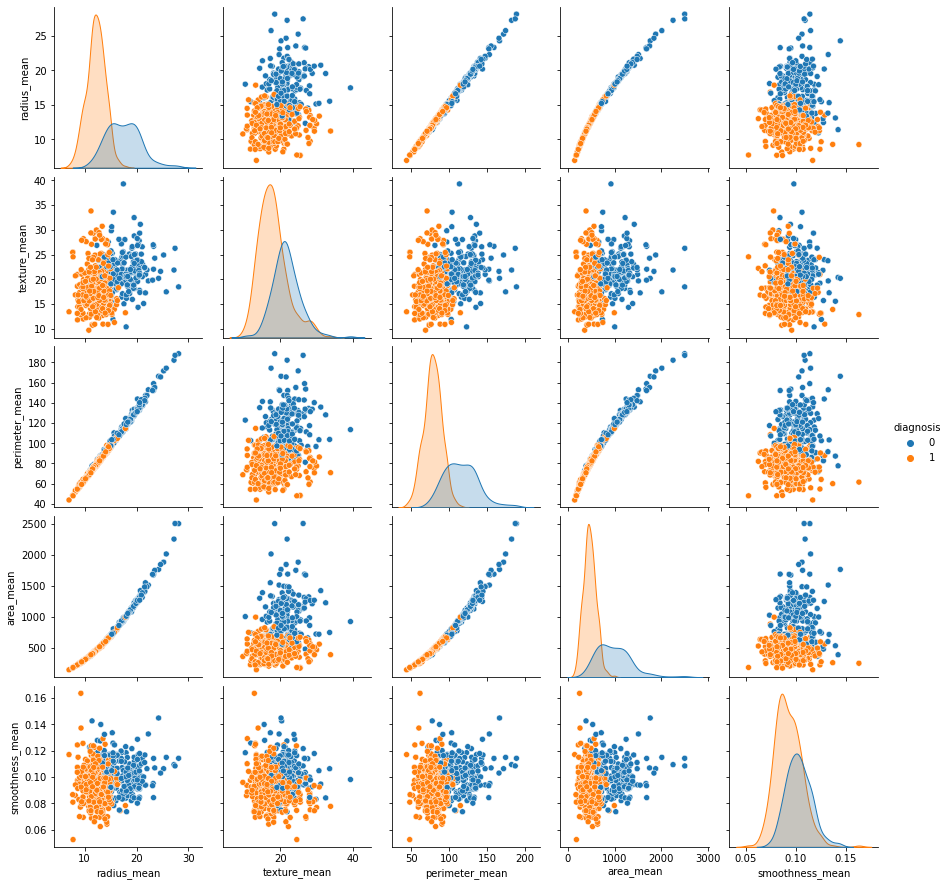

In [15]:
sns.pairplot(dataset,hue="diagnosis" ,vars = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean"] )

C:\Users\maitrik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

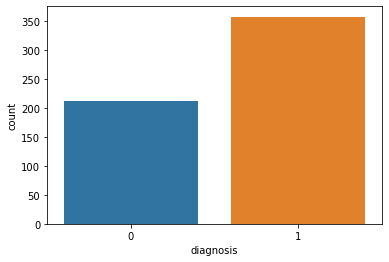

In [16]:
sns.countplot(dataset['diagnosis'])

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

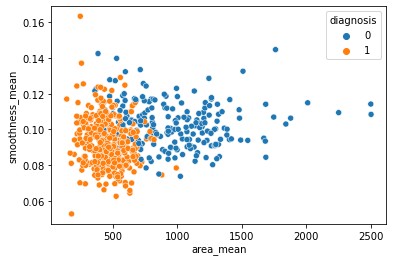

In [17]:
sns.scatterplot(x="area_mean",y="smoothness_mean", hue='diagnosis',data =dataset)

<AxesSubplot:>

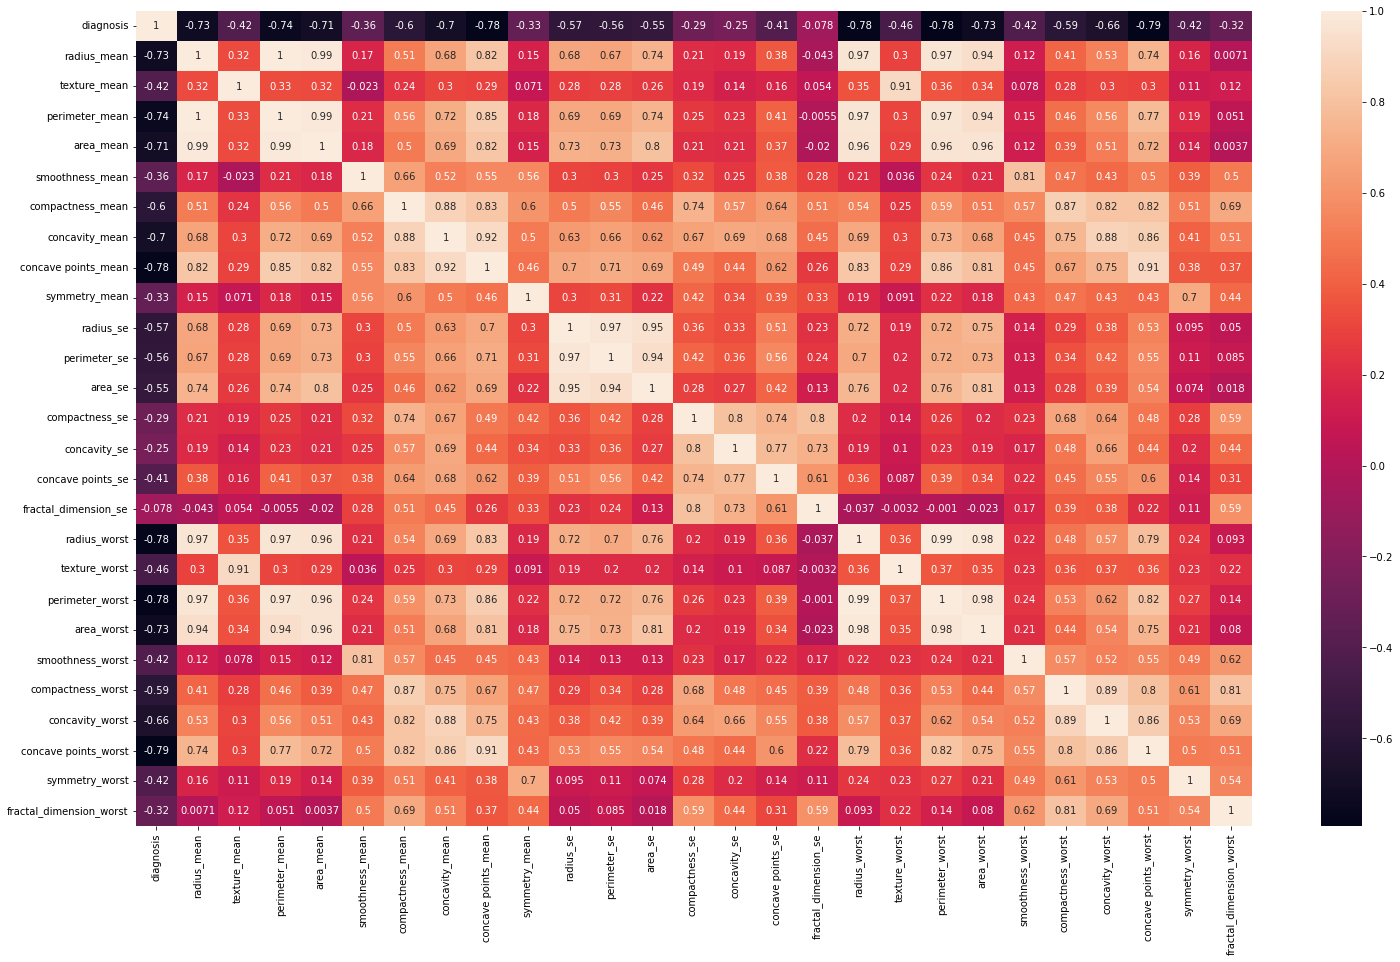

In [18]:
plt.figure(figsize =(25,15))
sns.heatmap(dataset.corr(),annot= True)

In [19]:
X = dataset.drop('diagnosis',axis =1)

In [20]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
y = dataset['diagnosis']

In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [23]:
x_train,x_test,y_train,y_test =  train_test_split(X,y, test_size = 0.2, random_state = 42)

## Model Training (SVM Support Vector Machine)

In [24]:
svc_model = SVC()

In [25]:
svc_model.fit(x_train,y_train)

SVC()

## Evaluating the Model (SVM)

In [26]:
y_predict = svc_model.predict(x_test) 

In [27]:
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [28]:
cm = confusion_matrix(y_test, y_predict)

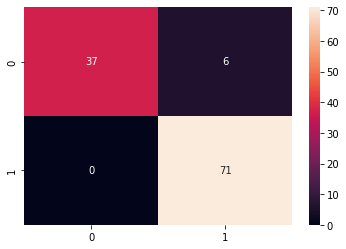

In [29]:
sns.heatmap(cm,annot= True);

In [30]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



## Improving the Model (SVM)

In [31]:
min_train = x_train.min()

In [32]:
range_train = (x_train-min_train).max()

In [33]:
x_train_scaled = (x_train-min_train)/range_train

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

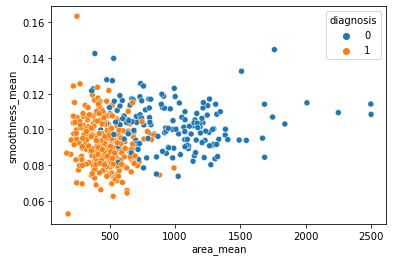

In [34]:
sns.scatterplot(x=x_train['area_mean'], y=x_train['smoothness_mean'], hue = y_train)

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

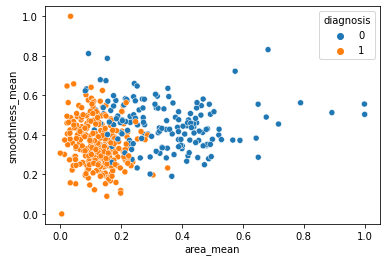

In [35]:
sns.scatterplot(x=x_train_scaled['area_mean'], y=x_train_scaled['smoothness_mean'], hue = y_train)

In [36]:
min_test = x_test.min()
range_test = (x_test - min_test).max()
x_test_scaled = (x_test - min_test)/range_test

In [37]:
svc_model.fit(x_train_scaled,y_train)

SVC()

In [38]:
y_predict = svc_model.predict(x_test_scaled)

In [39]:
cm = confusion_matrix(y_test, y_predict)

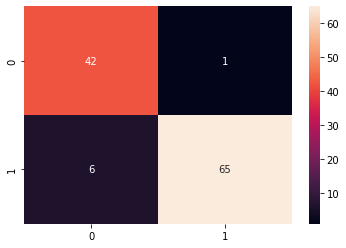

In [40]:
sns.heatmap(cm,annot= True);

In [41]:
report = classification_report(y_test, y_predict)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



## Improving the Model (SVM)

In [42]:
param_grid = { 'C':[0.1,1,10,100], 'gamma' :[1,0.1,0.01,0.001]}

In [43]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 4)

In [44]:
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.923 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.934 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.978 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.956 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.934 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.912 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.890 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.945 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.923 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.890 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=4)

In [45]:
grid.best_params_

{'C': 1, 'gamma': 1}

In [46]:
grid_predictions = grid.predict(x_test_scaled)

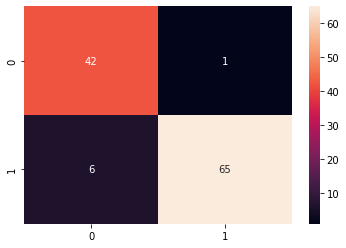

In [47]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot= True);

In [48]:
report = classification_report(y_test, y_predict)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.92      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



## Model Training (Random Forest Classifier)

In [49]:
rand_model = RandomForestClassifier(n_estimators=20)
rand_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [50]:
y_predict = rand_model.predict(x_test)

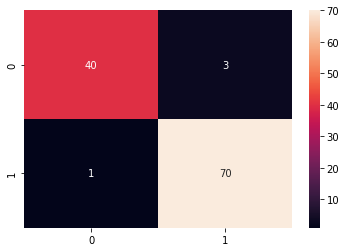

In [51]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot= True);

In [52]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Applying Hyperparameter Tuning

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
classifier = RandomForestClassifier(n_jobs = -1)

In [55]:
from scipy.stats import randint
param_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,27),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,27),
              }

In [56]:
search_clfr = RandomizedSearchCV(classifier, param_distributions = param_dist, n_jobs=-1, n_iter = 40, cv = 9)

In [57]:
search_clfr.fit(x_train, y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BEFBDF4940>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001BEFBE06B50>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]})

In [58]:
params = search_clfr.best_params_
score = search_clfr.best_score_
print(params)
print(score)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 13, 'min_samples_leaf': 5, 'n_estimators': 200}
0.9603485838779956


In [59]:
claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=100,bootstrap= True,criterion='gini',max_depth=20, max_features=8,min_samples_leaf= 1)

In [60]:
classifier.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1)

In [61]:
y_predict = classifier.predict(x_test)

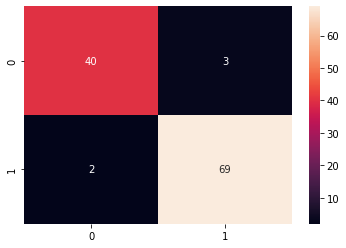

In [62]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot= True);

In [63]:
report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  radius_se                569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  area_se                  569 non-null    float64
 13  compactness_se           569 non-null    float64
 14  concavity_se             5

In [65]:
dataset.iloc[[1]]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,0,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902


In [66]:

maxValues = X.max()
 
print(maxValues)

radius_mean                  28.11000
texture_mean                 39.28000
perimeter_mean              188.50000
area_mean                  2501.00000
smoothness_mean               0.16340
compactness_mean              0.34540
concavity_mean                0.42680
concave points_mean           0.20120
symmetry_mean                 0.30400
radius_se                     2.87300
perimeter_se                 21.98000
area_se                     542.20000
compactness_se                0.13540
concavity_se                  0.39600
concave points_se             0.05279
fractal_dimension_se          0.02984
radius_worst                 36.04000
texture_worst                49.54000
perimeter_worst             251.20000
area_worst                 4254.00000
smoothness_worst              0.22260
compactness_worst             1.05800
concavity_worst               1.25200
concave points_worst          0.29100
symmetry_worst                0.66380
fractal_dimension_worst       0.20750
dtype: float

In [67]:
minValues = X.min()
 
print(minValues)

radius_mean                  6.981000
texture_mean                 9.710000
perimeter_mean              43.790000
area_mean                  143.500000
smoothness_mean              0.052630
compactness_mean             0.019380
concavity_mean               0.000000
concave points_mean          0.000000
symmetry_mean                0.106000
radius_se                    0.111500
perimeter_se                 0.757000
area_se                      6.802000
compactness_se               0.002252
concavity_se                 0.000000
concave points_se            0.000000
fractal_dimension_se         0.000895
radius_worst                 7.930000
texture_worst               12.020000
perimeter_worst             50.410000
area_worst                 185.200000
smoothness_worst             0.071170
compactness_worst            0.027290
concavity_worst              0.000000
concave points_worst         0.000000
symmetry_worst               0.156500
fractal_dimension_worst      0.055040
dtype: float

In [68]:
# import pickle
# pickle.dump(classifier, open("cancer.pkl",'wb'))